# Explore here

### We import the necessary modules for the project.

In [118]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, StratifiedKFold
from lazypredict.Supervised import LazyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import joblib




### We now download and store the data into /data/raw/*

In [2]:
# We specify the file we are downloading and where it is going to be saved.
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
output_path = r'D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\MACHINELEARNING\ML-Exercise\data\raw\data.csv'

In [3]:
# We will use 
response = requests.get(url)
with open(output_path, 'wb') as my_file:
    my_file.write(response.content)

print(f"File downloaded to {output_path}")

File downloaded to D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\MACHINELEARNING\ML-Exercise\data\raw\data.csv


### We now generate a dataframe to work with it.

In [4]:
df = pd.read_csv(r'D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\MACHINELEARNING\ML-Exercise\data\raw\data.csv', sep=";")
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,no


In [6]:
# We check the shape to have a better image of the dataframe:
df.shape


(41188, 21)

In [7]:
# We check the information of the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# From the data we have we will now check the information that might not be relevant at all for the goal we have in our prediction.
    1 - age. Age of customer (numeric) - YES
    2 - job. Type of job (categorical) - YES
    3 - marital. Marital status (categorical) - YES
    4 - education. Level of education (categorical) - YES
    5 - default. Do you currently have credit (categorical) - YES
    6 - housing. Do you have a housing loan (categorical) - YES
    7 - loan. Do you have a personal loan? (categorical) - YES
    8 - contact. Type of contact communication (categorical) - MAYBE 
    9 - month. Last month in which you have been contacted (categorical) - MAYBE
    10 - day_of_week. Last day on which you have been contacted (categorical) - MAYBE    
    11 - duration. Duration of previous contact in seconds (numeric) - MAYBE
    12 - campaign. Number of contacts made during this campaign to the customer (numeric) - MAYBE
    13 - pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric) - MAYBE
    14 - previous. Number of contacts made during the previous campaign to the customer (numeric) - MAYBE
    15 - poutcome. Result of the previous marketing campaign (categorical) - MAYBE
    16 - emp.var.rate. Employment variation rate. Quarterly indicator (numeric) - YES
    17 - cons.price.idx. Consumer price index. Monthly indicator (numeric) - YES
    18 - cons.conf.idx. Consumer confidence index. Monthly indicator (numeric) - YES
    19 - euribor3m. EURIBOR 3-month rate. Daily indicator (numeric) - MAYBE [WE HAVE TO CHECK THIS ONE TO FIND OUT IT IS A PERSONAL VALUE OR A GENERAL VALUE, IN WHICH CASE WOULD BE A NO.]
    20 - nr.employed. Number of employees. Quarterly indicator (numeric) - MAYBE [NUMBER OF EMPLOYEES OF THE BANK OR THAT HE MANAGES? PROBABLE IT IS A NO]

These decisions were made by looking at the description of the column title and its explanation. Those that have a MAYBE must be examined to determine if they will be relevant or not.

In [8]:
# We will check if there is any column that has a unique variable.
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

As there are no columns with a unique variable, we will proceed to check the value counts of each column to obtain a clearer view of the data we will work with, as well as identify inconsistencies.

In [9]:
# We generate a loop to iterate on each column.
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("-" * 40)

Value counts for age:
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
----------------------------------------
Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------
Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
----------------------------------------
Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown             

The columns month, day_of_week, duration and campaign are results obtained after having contact with the customer during this campaign. Because we are aiming to predict before contacting our customer if he is a potential candidate, this information would not be available for the person aiming to predict.

Therefore we will drop those columns.

In [10]:
df.drop(columns = ["month","day_of_week","duration","campaign"], inplace = True)


The default column has only 3 instances marked as 'Yes' out of 41,188 entries, with the remaining values being 'No' (32,588) and 'Unknown' (8,597). Although the 'Yes' cases are rare, it’s possible that having a default doesn’t necessarily mean a customer will be excluded from selection. It’s likely that much of the database was previously filtered, discarding these customers before any contact attempts were made. We will visually inspect the data for the 'Unknown' and 'Yes' responses to explore this further.

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [12]:
# We will now check if all the default = yes values do have the same result, which we believe will be "no".

# We create a boolean mask for rows where 'default' is equal to 'Yes'
mask = df['default'].isin(['yes'])

# We use the mask to filter the DataFrame and select only 'default' and 'y' columns
filtered_df = df.loc[mask, ['default', 'y']]

print(filtered_df)

      default   y
21580     yes  no
21581     yes  no
24866     yes  no


In [13]:
# We will now check if the unknown value have all the same result.
# We create a boolean mask for rows where 'default' is 'unknown'
mask = df['default'].isin(['unknown'])

# We use the mask to filter the DataFrame and select only 'default' and 'y' columns
filtered_df = df.loc[mask, ['default', 'y']]

print(filtered_df.value_counts())

default  y  
unknown  no     8154
         yes     443
Name: count, dtype: int64


It’s possible that the low number of entries with default = yes is due to a manual pre-filtering process performed by bank employees, since we only have data for those contacted during the last campaign. We could assume this is the case, which would explain the small number of 'Yes' values. However, this raises concerns about potential bias, especially due to the limited data, which could lead to data leakage during the training phase.

To address this, we will transform the default column into a binary feature, where 'Yes' and 'No' are combined into (1) and 'Unknown' becomes (0), indicating whether the default status is known. We will then assess the relevance of this variable for the model.

In [14]:
# We will specify the values in the mapping (no or yes = 1, unknown = 0).
mapping = {'no': 1, 'yes': 1, 'unknown': 0}

df['default'] = df['default'].map(mapping)

In [15]:
df['default'].value_counts()

default
1    32591
0     8597
Name: count, dtype: int64

In [16]:
# We print the top bit to refresh our memory on how the project is looking like.
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,1,no,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,0,no,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,1,yes,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,1,no,no,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,1,no,yes,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


### We will now address the loan column, we would have prefered to do a binary selection from yes and no, however, we saw it has 3 unique values. We will see the percentages to decide how to continue.

In [17]:
print(df['loan'].unique())

['no' 'yes' 'unknown']


In [18]:
loan_distribution = df['loan'].value_counts(normalize=True)
print(loan_distribution)

loan
no        0.82
yes       0.15
unknown   0.02
Name: proportion, dtype: float64


We can see there is a significant imbalance between yes and no, where the no values represent 82% of the data in the loan column, which could affect to the model's performance.

We will continue by investigating the characteristics of the 'unknown' group. We aim to find out if their results differ significantly from 'yes' or 'no' groups in other columns.

We will aswell analyse the relationship between loan status and other variables in the dataset.

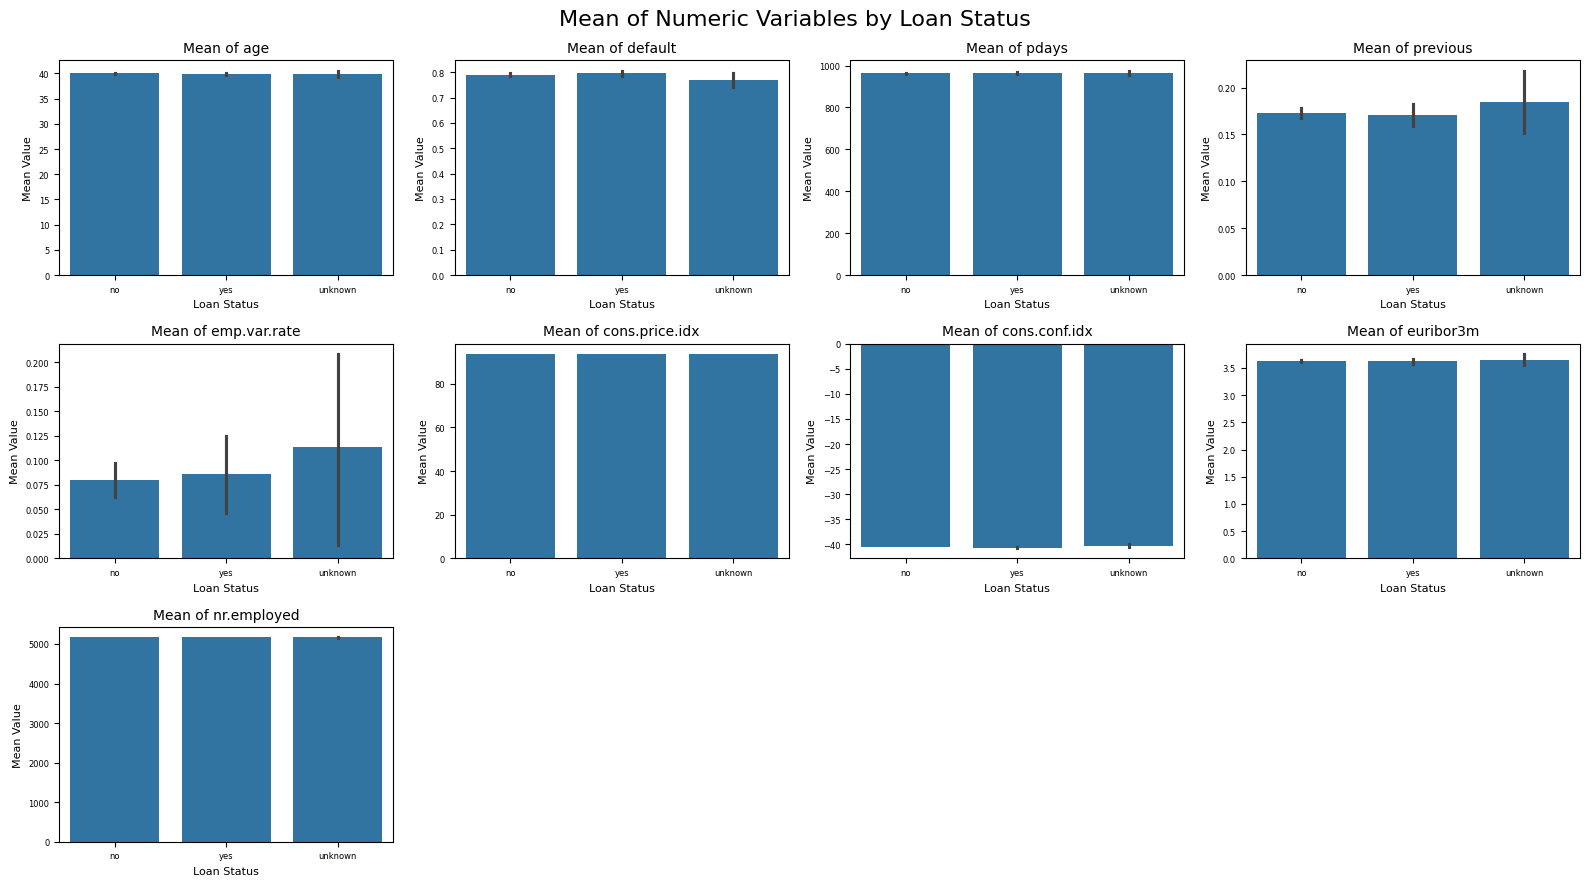

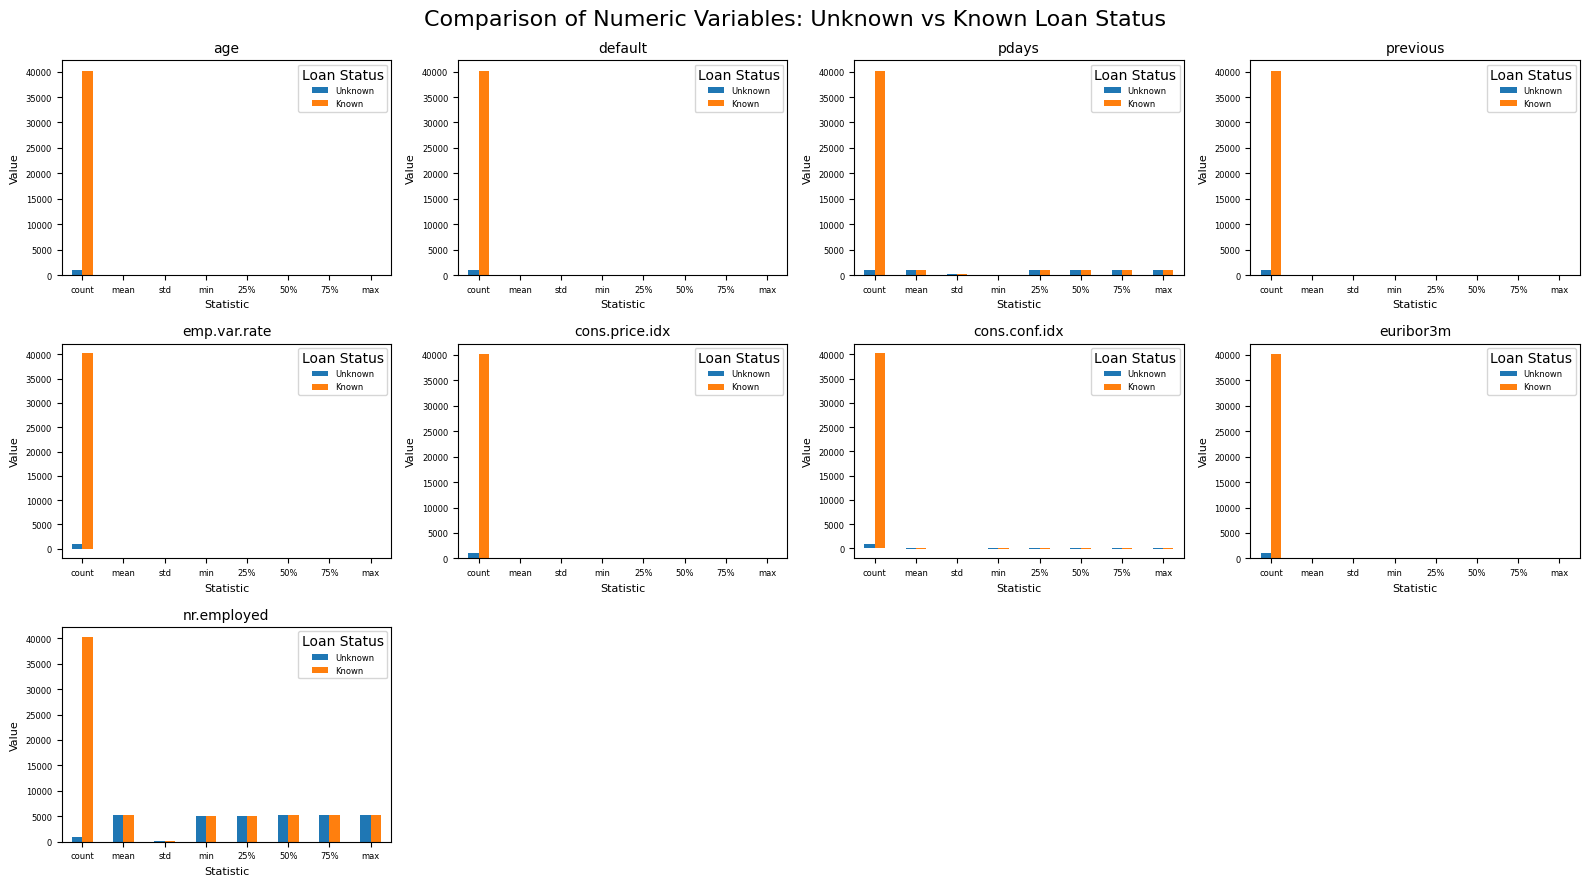

In [19]:
plt.style.use('default')

# Analyze relationships with other variables that have numbers.
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a figure with subplots for each numeric column, 4 per row
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 3 * 3))
fig.suptitle('Mean of Numeric Variables by Loan Status', fontsize=16)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 4, i % 4] if 3 > 1 else axes[i % 4]
    sns.barplot(x='loan', y=column, data=df, ax=ax)
    ax.set_title(f'Mean of {column}', fontsize=10)
    ax.set_xlabel('Loan Status', fontsize=8)
    ax.set_ylabel('Mean Value', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.tick_params(axis='x')

# Remove any unused subplots
for i in range(len(numeric_columns), 3 * 4):
    fig.delaxes(axes[i // 4, i % 4] if 3 > 1 else axes[i % 4])

plt.tight_layout()
plt.show()

# Characteristics of 'unknown' group vs 'known' group
unknown_profile = df[df['loan'] == 'unknown'].describe()
known_profile = df[df['loan'] != 'unknown'].describe()

# Create a comparison plot for 'unknown' vs 'known' groups
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 3 * 3))
fig.suptitle('Comparison of Numeric Variables: Unknown vs Known Loan Status', fontsize=16)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 4, i % 4] if 3 > 1 else axes[i % 4]
    data = pd.DataFrame({
        'Unknown': unknown_profile.loc[:, column],
        'Known': known_profile.loc[:, column]
    })
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'{column}', fontsize=10)
    ax.set_xlabel('Statistic', fontsize=8)
    ax.set_ylabel('Value', fontsize=8)
    ax.legend(title='Loan Status', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.tick_params(axis='x', rotation=360)

# Remove any unused subplots
for i in range(len(numeric_columns), 3 * 4):
    fig.delaxes(axes[i // 4, i % 4] if 3 > 1 else axes[i % 4])

plt.tight_layout()
plt.show()

### We noticed that there are many columns with unknown values. We will highlight the unknown values in a matrix to see if we can observe some kind of visual pattern.

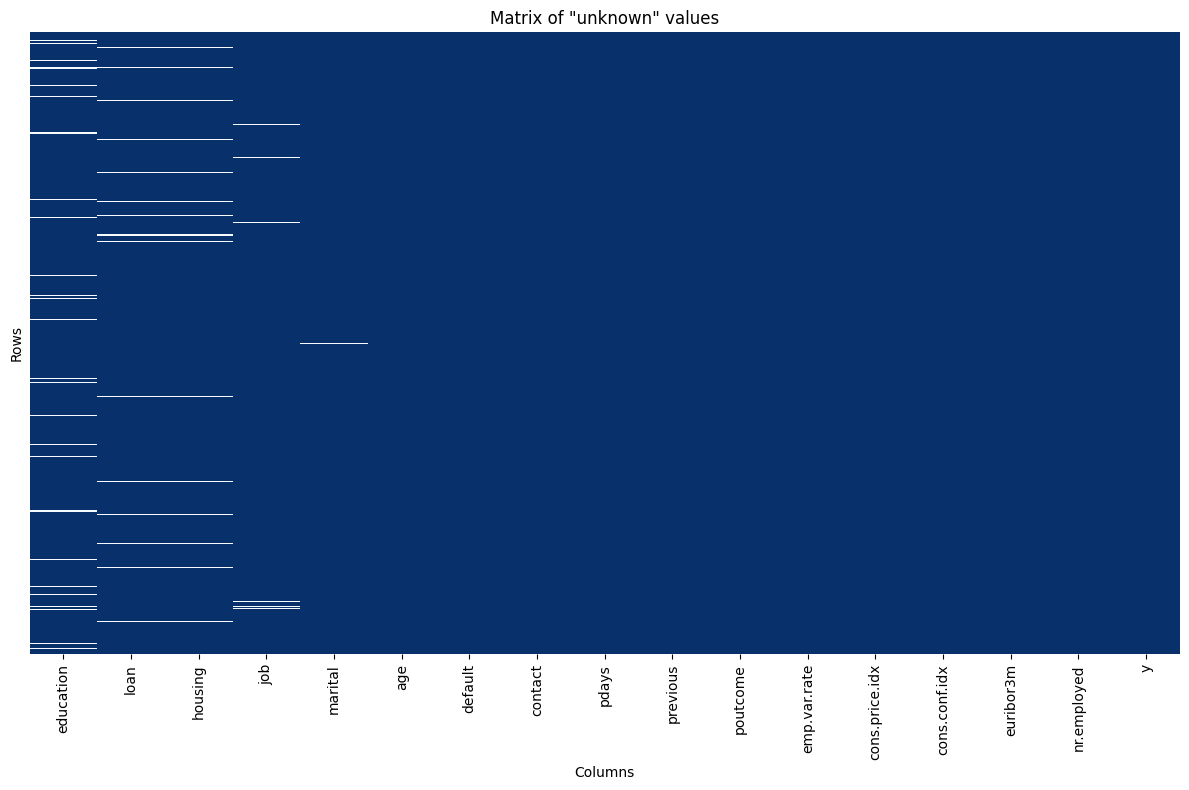

In [20]:
def unknown_matrix(df, unknown_value='unknown'):
    # Create a boolean matrix where True represents 'unknown' values
    unknown_matrix = (df == unknown_value).astype(int)

    # Calculate the sorting order based on the number of 'unknown' values
    sorted_columns = unknown_matrix.sum().sort_values(ascending=False).index

    # Reorder the matrix based on the sorting
    unknown_matrix = unknown_matrix[sorted_columns]

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(unknown_matrix, cmap='Blues_r', cbar=False, yticklabels=False)

    # Customize the plot
    plt.title('Matrix of "unknown" values')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

unknown_matrix(df)

Because we are looking for a binary column for loan, and from the analysis made, we didnt find any main differences between the groups correlations, besides the ammount of data they cover, we will proceed to fill the unknown values with K-nearest.

In [21]:
# We replace categories with numeric values and transform unknown to nan values to be ready for the next step.
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0, 'unknown': np.nan}).infer_objects(copy=False)

# We prepare 2D array of data for imputation.
X = df[['loan']].values

# We perform imputation.
imputer = KNNImputer(n_neighbors=5)
df['loan'] = imputer.fit_transform(X)

# We round to nearest integer and map back to categories
df['loan'] = df['loan'].round().astype(int)

# We check the values in the loan table.
df['loan'].value_counts()

loan
0    34940
1     6248
Name: count, dtype: int64

The next column to check, will be housing, for we want it to be binary as well, due to either having a housing loan or not.

In [22]:
# We begin by checking the unique value count to see if there is an imbalance aswell.

housing_loan_distribution = df['housing'].value_counts(normalize=True)
print(housing_loan_distribution)

housing
yes       0.52
no        0.45
unknown   0.02
Name: proportion, dtype: float64


We can see there is a balanced amount of data, where 52% of the instances do have a housing loan, while only 2% is unknown.

We will perform as well a k-nearest to fill the unknown values with a binary result.

In [23]:
# We replace categories with numeric values and transform unknown to nan values to be ready for the next step.
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0, 'unknown': np.nan}).infer_objects(copy=False)

# We prepare 2D array of data for imputation.
X = df[['housing']].values

# We perform imputation.
imputer = KNNImputer(n_neighbors=5)
df['housing'] = imputer.fit_transform(X)

# We round to nearest integer and map back to categories
df['housing'] = df['housing'].round().astype(int)

# We check the values in the loan table.
df['housing'].value_counts()

housing
1    22566
0    18622
Name: count, dtype: int64

In [24]:
new_housing_loan_distribution = df['housing'].value_counts(normalize=True)
print(housing_loan_distribution)
print("-"*40)
print(new_housing_loan_distribution)

housing
yes       0.52
no        0.45
unknown   0.02
Name: proportion, dtype: float64
----------------------------------------
housing
1   0.55
0   0.45
Name: proportion, dtype: float64


It looks like all the unknown values in the rest of the data are very similar to the values of housing = yes

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,1,0,0,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,0,0,0,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,1,1,0,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,1,0,0,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,1,0,1,telephone,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


We will now check the poutcome, which we will encode. For nonexistent means they were not contacted for the previous campaign, and their previous results (success and failure).

In [26]:
df["poutcome"].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [27]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['poutcome'], df['y'], normalize='index')

# Display the results
print(cross_tab)

# Calculate the counts (not percentages) for a clearer view of absolute numbers
cross_tab_counts = pd.crosstab(df['poutcome'], df['y'])
print("\nCounts:")
print(cross_tab_counts)

# For those in 'failure' category
failure_results = df[df['poutcome'] == 'failure']['y'].value_counts(normalize=True)
print("\nResults for 'failure' category:")
print(failure_results)

# For those in 'success' category
success_results = df[df['poutcome'] == 'success']['y'].value_counts(normalize=True)
print("\nResults for 'success' category:")
print(success_results)

y             no  yes
poutcome             
failure     0.86 0.14
nonexistent 0.91 0.09
success     0.35 0.65

Counts:
y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894

Results for 'failure' category:
y
no    0.86
yes   0.14
Name: proportion, dtype: float64

Results for 'success' category:
y
yes   0.65
no    0.35
Name: proportion, dtype: float64


We observe how both the previous failure outcomes and nonexistent contact had mostly a negative answer. And those that were successful in the past, were not really that successful. We were considering to map unknown as 0, failure as 1 and succes as 2, for the when the previous outcome is nonexistent, it's highly likely to result in a 'no' (91.17%), previous failures mostly lead to 'no' outcomes (85.77%) and previous successes tend to lead to 'yes' outcomes, but not always (65.11%). However, the distances between the % of success is not equal, and it could lead to a linear progression from unknown to success, which might not reflect reality.

We decided instead to binary encoding but with the following approach:
    1- had_previous_contact
    2- previous_success
This way we will be stating which of them were previously contacted and if that contact was successful, mainly because the % of success between those that didn't have previous contact and those that previously didn't succeed are very likely to not be successful anyways.

In [28]:
# Had previous contact
df['had_previous_contact'] = (df['poutcome'] != 'nonexistent').astype(int)

# Previous contact was successful
df['previous_success'] = (df['poutcome'] == 'success').astype(int)

# Drop the original 'poutcome' column
df = df.drop('poutcome', axis=1)

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success
0,56,housemaid,married,basic.4y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0
1,57,services,married,high.school,0,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0
2,37,services,married,high.school,1,1,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0
3,40,admin.,married,basic.6y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0
4,56,services,married,high.school,1,0,1,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0


In [30]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['job'], df['y'], normalize='index')

# Display the results
print(cross_tab)

# Calculate the counts (not percentages) for a clearer view of absolute numbers
cross_tab_counts = pd.crosstab(df['job'], df['y'])
print("\nCounts:")
print(cross_tab_counts)

# Iterate through unique job values and calculate normalized counts
for job_value in df['job'].unique():
    job_results = df[df['job'] == job_value]['y'].value_counts(normalize=True)
    print(f"\nResults for '{job_value}' category:")
    print(job_results)

y               no  yes
job                    
admin.        0.87 0.13
blue-collar   0.93 0.07
entrepreneur  0.91 0.09
housemaid     0.90 0.10
management    0.89 0.11
retired       0.75 0.25
self-employed 0.90 0.10
services      0.92 0.08
student       0.69 0.31
technician    0.89 0.11
unemployed    0.86 0.14
unknown       0.89 0.11

Counts:
y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37

Results for 'housemaid' category:
y
no    0.90
yes   0.10
Name: proportion, dtype: float64

Results for 'services' category:
y
no    0.92
yes   0.08
Name: proportion, dtype: float64

Results for 'admin.' category:
y
no    0.87
yes   0.13
Name: proportion, dtype: float64

Results for 'blue-

In [31]:
job_success_rate = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean())

In [32]:
df['job_success_rate'] = df['job'].map(job_success_rate)

In [33]:
df['job_success_rate'] = df['job_success_rate'].round(6)

In [34]:
print(df[['job', 'job_success_rate', 'y']].head(10))


           job  job_success_rate   y
0    housemaid              0.10  no
1     services              0.08  no
2     services              0.08  no
3       admin.              0.13  no
4     services              0.08  no
5     services              0.08  no
6       admin.              0.13  no
7  blue-collar              0.07  no
8   technician              0.11  no
9     services              0.08  no


In [35]:
df.drop(columns = ["job"], inplace = True)

In [36]:
df.head()

,age,marital,education,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success,job_success_rate
0,56,married,basic.4y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.10
1,57,married,high.school,0,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08
2,37,married,high.school,1,1,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08
3,40,married,basic.6y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.13
4,56,married,high.school,1,0,1,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08


We will follow the same principle with marital column.

In [37]:
# Create a cross-tabulation
cross_tab_marital = pd.crosstab(df['marital'], df['y'], normalize='index')

# Display the results
print(df["marital"].value_counts())
print("-"*40)
print(cross_tab_marital)



marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
----------------------------------------
y          no  yes
marital           
divorced 0.90 0.10
married  0.90 0.10
single   0.86 0.14
unknown  0.85 0.15


Unknown, with only 80 instances, being the highest percentage, might result in unnacurate data or results. We will apply a Smoothed Target Encoding to reduce the influence of the unknown variable, while maintaining the influence of the other variables. 

In [38]:

def encode_marital_status(df, smoothing=1000):
    # Convert 'y' to binary
    y_binary = (df['y'] == 'yes').astype(int)
    
    # Apply encoding
    encoder = TargetEncoder(cols=['marital'], smoothing=smoothing)
    df['marital_encoded'] = encoder.fit_transform(df['marital'], y_binary)
        
    print("\n'Yes' percentages for each marital status:")
    print(df.groupby('marital')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False))

    print("-" * 40)

    print("\nEncoding map for marital status:")
    print(df.groupby('marital')['marital_encoded'].mean().sort_values(ascending=False))
    
    return df

# Apply encoding
df = encode_marital_status(df, smoothing=1000)



'Yes' percentages for each marital status:
marital
unknown    0.15
single     0.14
divorced   0.10
married    0.10
Name: y, dtype: float64
----------------------------------------

Encoding map for marital status:
marital
single     0.14
unknown    0.13
divorced   0.10
married    0.10
Name: marital_encoded, dtype: float64


In [39]:
df.drop(columns = ["marital"], inplace = True)

In [40]:
df.head()

,age,education,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success,job_success_rate,marital_encoded
0,56,basic.4y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.10,0.10
1,57,high.school,0,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10
2,37,high.school,1,1,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10
3,40,basic.6y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.13,0.10
4,56,high.school,1,0,1,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10


In [41]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['education'], df['y'], normalize='index')

# Display the results
print(cross_tab)

# Calculate the counts (not percentages) for a clearer view of absolute numbers
cross_tab_counts = pd.crosstab(df['education'], df['y'])
print("\nCounts:")
print(cross_tab_counts)

y                     no  yes
education                    
basic.4y            0.90 0.10
basic.6y            0.92 0.08
basic.9y            0.92 0.08
high.school         0.89 0.11
illiterate          0.78 0.22
professional.course 0.89 0.11
university.degree   0.86 0.14
unknown             0.85 0.15

Counts:
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


Because we had a few variables with very few instances and unknown values that could affect the model, we will aswell smooth them and will ad another binary column called over_basic_9y_ed which those that are over basic.9y education will have a 1 and those under will have a 0.

In [42]:
def encode_education_status(df, smoothing=1000):
    # Convert 'y' to binary
    y_binary = (df['y'] == 'yes').astype(int)
    
    # Apply encoding
    encoder = TargetEncoder(cols=['education'], smoothing=smoothing)
    df['education_encoded'] = encoder.fit_transform(df['education'], y_binary)
        
    print("\n'Yes' percentages for each education status:")
    print(df.groupby('education')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False))

    print("-" * 40)

    print("\nEncoding map for education status:")
    print(df.groupby('education')['education_encoded'].mean().sort_values(ascending=False))
    
    return df

# Apply encoding
df = encode_education_status(df, smoothing=1000)


'Yes' percentages for each education status:
education
illiterate            0.22
unknown               0.15
university.degree     0.14
professional.course   0.11
high.school           0.11
basic.4y              0.10
basic.6y              0.08
basic.9y              0.08
Name: y, dtype: float64
----------------------------------------

Encoding map for education status:
education
illiterate            0.17
unknown               0.14
university.degree     0.14
professional.course   0.11
high.school           0.11
basic.4y              0.10
basic.6y              0.08
basic.9y              0.08
Name: education_encoded, dtype: float64


In [43]:
above_basic_9y = ['high.school', 'professional.course', 'university.degree']

# Create the new column with direct mapping
df['over_basic_9y_ed'] = df['education'].map(
    lambda x: 1 if x in above_basic_9y else (0 if x != 'unknown' else np.nan)
)

# Display results
print(df[['education', 'over_basic_9y_ed']].drop_duplicates())

print("\nDistribution of over_basic_9y_ed:")
print(df['over_basic_9y_ed'].value_counts(normalize=True, dropna=False))

# Optional: Show the count of NaN values
print("\nCount of NaN values:")
print(df['over_basic_9y_ed'].isna().sum())

                education  over_basic_9y_ed
0                basic.4y              0.00
1             high.school              1.00
3                basic.6y              0.00
5                basic.9y              0.00
6     professional.course              1.00
7                 unknown               NaN
25      university.degree              1.00
5393           illiterate              0.00

Distribution of over_basic_9y_ed:
over_basic_9y_ed
1.00   0.65
0.00   0.30
NaN    0.04
Name: proportion, dtype: float64

Count of NaN values:
1731


In [44]:
df.head()

,age,education,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success,job_success_rate,marital_encoded,education_encoded,over_basic_9y_ed
0,56,basic.4y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.10,0.10,0.10,0.00
1,57,high.school,0,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1.00
2,37,high.school,1,1,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1.00
3,40,basic.6y,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.13,0.10,0.08,0.00
4,56,high.school,1,0,1,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1.00


In [45]:
features_for_imputation = ['marital_encoded', 'job_success_rate', 'education_encoded'] 

# Prepare the data for KNN imputation
X = df[features_for_imputation]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add the 'over_basic_9y_ed' column to the scaled features
X_with_target = np.column_stack((X_scaled, df['over_basic_9y_ed']))

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(X_with_target)

# Update the 'over_basic_9y_ed' column with imputed values
df['over_basic_9y_ed'] = imputed_data[:, -1]

# Round the imputed values to 0 or 1
df['over_basic_9y_ed'] = df['over_basic_9y_ed'].round().astype(int)

# Display results
print("Distribution of over_basic_9y_ed after imputation:")
print(df['over_basic_9y_ed'].value_counts(normalize=True))

Distribution of over_basic_9y_ed after imputation:
over_basic_9y_ed
1   0.70
0   0.30
Name: proportion, dtype: float64


In [46]:
df['over_basic_9y_ed'].value_counts()

over_basic_9y_ed
1    28657
0    12531
Name: count, dtype: int64

In [47]:
df.drop(columns = ["education"], inplace = True)

In [48]:
df.head()

,age,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success,job_success_rate,marital_encoded,education_encoded,over_basic_9y_ed
0,56,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.10,0.10,0.10,0
1,57,0,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1
2,37,1,1,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1
3,40,1,0,0,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.13,0.10,0.08,0
4,56,1,0,1,telephone,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1


In [49]:
df["contact"].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [50]:
# Crear el diccionario de mapeo
mapping = {'cellular': 1, 'telephone': 0}

# Aplicar el mapeo a la columna 'contact'
df['contact'] = df['contact'].map(mapping)

In [51]:
df["contact"].value_counts()

contact
1    26144
0    15044
Name: count, dtype: int64

In [52]:
df.head()

,age,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success,job_success_rate,marital_encoded,education_encoded,over_basic_9y_ed
0,56,1,0,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.10,0.10,0.10,0
1,57,0,0,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1
2,37,1,1,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1
3,40,1,0,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.13,0.10,0.08,0
4,56,1,0,1,0,999,0,1.10,93.99,-36.40,4.86,5191.00,no,0,0,0.08,0.10,0.11,1


In [53]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

df.head()

,age,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success,job_success_rate,marital_encoded,education_encoded,over_basic_9y_ed
0,56,1,0,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.10,0.10,0.10,0
1,57,0,0,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.08,0.10,0.11,1
2,37,1,1,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.08,0.10,0.11,1
3,40,1,0,0,0,999,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.13,0.10,0.08,0
4,56,1,0,1,0,999,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.08,0.10,0.11,1


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.00,40.02,10.42,17.00,32.00,38.00,47.00,98.00
default,41188.00,0.79,0.41,0.00,1.00,1.00,1.00,1.00
housing,41188.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
loan,41188.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
contact,41188.00,0.63,0.48,0.00,0.00,1.00,1.00,1.00
pdays,41188.00,962.48,186.91,0.00,999.00,999.00,999.00,999.00
previous,41188.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41188.00,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41188.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41188.00,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90


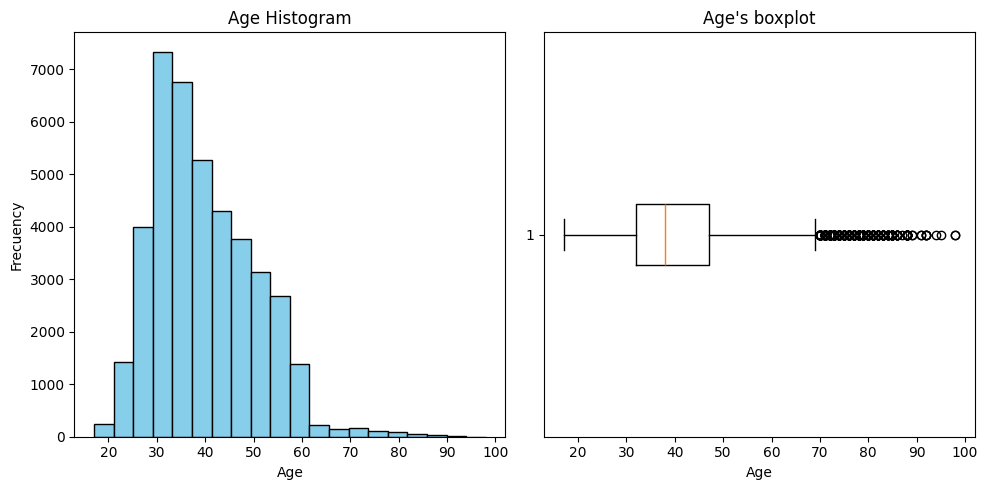

In [55]:
# We create a figure with two subplots (one for histosgram and another for the boxplot)
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# We create the histogram for the first subplot.
ax[0].hist(df['age'], bins = 20, color='skyblue', edgecolor = 'black')
ax[0].set_title('Age Histogram')
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frecuency")

# We create the boxplot content in the second subplot.
ax[1].boxplot(df['age'], vert = False)
ax[1].set_title("Age's boxplot")
ax[1].set_xlabel("Age")

# We display the plots.
plt.tight_layout()
plt.show()

From analyzing the histogram and boxplot of the age column, we can see how most of the data is concentrated around people from almost 30 to 60 years old, however the outliers don't seem extreme enough to warrant removal, we clearly see how our histogram is right-skewed.

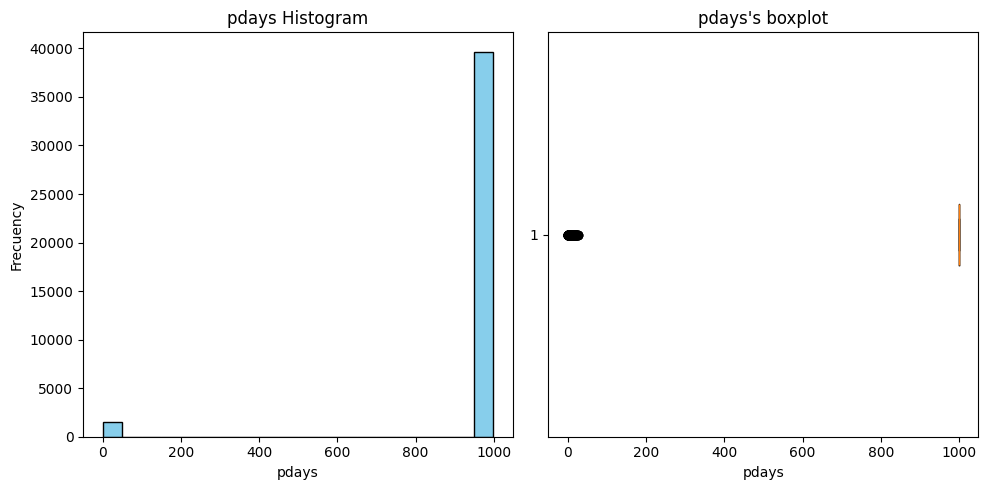

In [56]:
# We create a figure with two subplots (one for histosgram and another for the boxplot)
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# We create the histogram for the first subplot.
ax[0].hist(df['pdays'], bins = 20, color='skyblue', edgecolor = 'black')
ax[0].set_title('pdays Histogram')
ax[0].set_xlabel("pdays")
ax[0].set_ylabel("Frecuency")

# We create the boxplot content in the second subplot.
ax[1].boxplot(df['pdays'], vert = False)
ax[1].set_title("pdays's boxplot")
ax[1].set_xlabel("pdays")

# We display the plots.
plt.tight_layout()
plt.show()

We can see from the value_counts that we initially realised, that 999 is the most common value. That number, might not really mean the number of days since it was last contacted, but to be a constant for when there has been no contact done after more than one month, for the biggest number after 999, would be 27.

To address this data we will transform all the 999 values to 31 which would still be the highest number.

In [57]:
df['pdays'] = df['pdays'].replace(999, 31)

In [58]:
df.head()

,age,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success,job_success_rate,marital_encoded,education_encoded,over_basic_9y_ed
0,56,1,0,0,0,31,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.10,0.10,0.10,0
1,57,0,0,0,0,31,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.08,0.10,0.11,1
2,37,1,1,0,0,31,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.08,0.10,0.11,1
3,40,1,0,0,0,31,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.13,0.10,0.08,0
4,56,1,0,1,0,31,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,0.08,0.10,0.11,1


We will now proceed to separate data randomly for testing and training. 

In [59]:
X = df.drop(['y'], axis=1)
y = df.y

In [60]:
# We identify Binary and non-binary columns
binary_columns = X.columns[X.isin([0, 1]).all()].tolist()
non_binary_columns = X.columns.difference(binary_columns).tolist()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We will now use lazy predict to decide what type of model would probably be the most efficient to work with in our dataset, and we will proceed to tune the data after making that decision.

In [62]:
# Create and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the performance of all models
print(models)

100%|██████████| 31/31 [07:29<00:00, 14.50s/it]

[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.76               0.73     0.73      0.80   
BernoulliNB                        0.81               0.70     0.70      0.83   
QuadraticDiscriminantAnalysis      0.88               0.70     0.70      0.88   
GaussianNB                         0.84

Based on these metrics, I would choose the NearestCentroid classifier for the following reasons:

Even though it has a lower accuracy than other models, it has the highest Balanced Accuracy and ROC AUC (0.72), which are crucial for imbalanced datasets (like ours).

Its F1 Score (0.80) is good, even though is not the highest.

It's extremely fast to train and predict (0.05s).

We will now transform the non-binary data to follow a standard and we will use two different techniques to evaluate which one would be more effective and choose one.

In [63]:
# Function to scale data and return a DataFrame
def scale_data(scaler, X_train, X_test):
    # Scale non-binary columns
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])
    X_test_scaled[non_binary_columns] = scaler.transform(X_test[non_binary_columns])
    
    return X_train_scaled, X_test_scaled

In [64]:
# Create MinMaxScaler version
minmax_scaler = MinMaxScaler()
X_train_minmax, X_test_minmax = scale_data(minmax_scaler, X_train, X_test)

# Create StandardScaler version
standard_scaler = StandardScaler()
X_train_standard, X_test_standard = scale_data(standard_scaler, X_train, X_test)

In [65]:
# Function to fit model and print results
def fit_and_evaluate(X_train, X_test, y_train, y_test, scaler_name):
    model = NearestCentroid()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nResults with {scaler_name}:")
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    feature_importances = np.abs(model.centroids_[1] - model.centroids_[0])
    feature_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)
    print("\nTop 10 Feature Importances:")
    print(feature_importance_df.head(10))
    
    return model, feature_importance_df

In [66]:
# Fit and evaluate with MinMaxScaler
model_minmax, importances_minmax = fit_and_evaluate(X_train_minmax, X_test_minmax, y_train, y_test, "MinMaxScaler")

# Fit and evaluate with StandardScaler
model_standard, importances_standard = fit_and_evaluate(X_train_standard, X_test_standard, y_train, y_test, "StandardScaler")

# Compare feature importances
print("\nComparison of top 10 features:")
comparison = pd.merge(importances_minmax.head(10), importances_standard.head(10), 
                      on='feature', suffixes=('_minmax', '_standard'))
print(comparison)


Results with MinMaxScaler:
Balanced Accuracy: 0.7268192190669371

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      7310
           1       0.25      0.74      0.37       928

    accuracy                           0.72      8238
   macro avg       0.60      0.73      0.60      8238
weighted avg       0.88      0.72      0.77      8238


Top 10 Feature Importances:
                 feature  importance
10             euribor3m        0.38
7           emp.var.rate        0.30
11           nr.employed        0.30
4                contact        0.22
12  had_previous_contact        0.21
13      previous_success        0.18
5                  pdays        0.16
1                default        0.13
8         cons.price.idx        0.09
14      job_success_rate        0.09

Results with StandardScaler:
Balanced Accuracy: 0.7299908014528986

Classification Report:
              precision    recall  f1-score   support



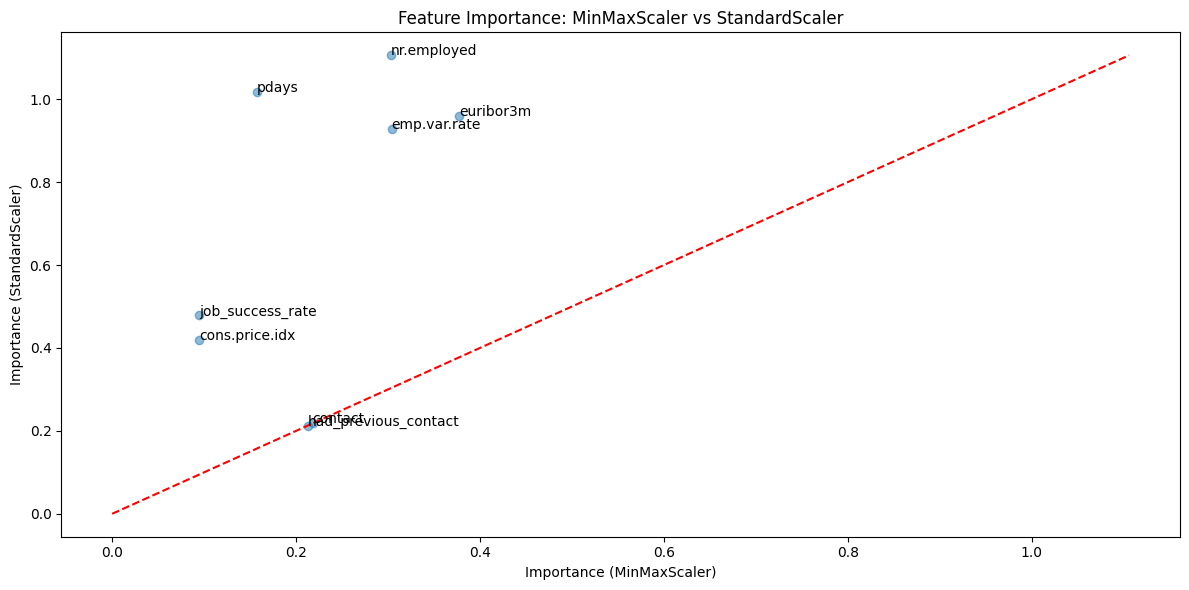

In [67]:
plt.figure(figsize=(12, 6))
plt.scatter(comparison['importance_minmax'], comparison['importance_standard'], alpha=0.5)
plt.plot([0, max(comparison['importance_minmax'].max(), comparison['importance_standard'].max())], 
         [0, max(comparison['importance_minmax'].max(), comparison['importance_standard'].max())], 
         'r--')
for i, txt in enumerate(comparison['feature']):
    plt.annotate(txt, (comparison['importance_minmax'][i], comparison['importance_standard'][i]))
plt.xlabel('Importance (MinMaxScaler)')
plt.ylabel('Importance (StandardScaler)')
plt.title('Feature Importance: MinMaxScaler vs StandardScaler')
plt.tight_layout()
plt.show()

In [68]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,age,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,had_previous_contact,previous_success,job_success_rate,marital_encoded,education_encoded,over_basic_9y_ed,y
age,1.000,-0.169,-0.003,-0.004,-0.008,-0.034,0.021,0.002,0.002,0.127,0.014,-0.014,0.013,0.033,0.130,-0.410,-0.024,-0.135,0.029
default,-0.169,1.000,0.018,0.005,0.137,-0.080,0.107,-0.207,-0.173,-0.026,-0.199,-0.194,0.109,0.077,0.103,0.128,0.149,0.205,0.099
housing,-0.003,0.018,1.000,0.037,0.078,-0.013,0.027,-0.059,-0.076,-0.029,-0.059,-0.047,0.030,0.012,0.012,0.020,0.014,0.015,0.010
loan,-0.004,0.005,0.037,1.000,0.015,0.002,-0.002,-0.002,-0.011,-0.012,-0.003,0.002,0.000,-0.003,0.005,0.005,0.011,0.008,-0.000
contact,-0.008,0.137,0.078,0.015,1.000,-0.115,0.213,-0.392,-0.590,-0.251,-0.398,-0.267,0.243,0.110,0.097,0.072,0.101,0.095,0.143
pdays,-0.034,-0.080,-0.013,0.002,-0.115,1.000,-0.584,0.272,0.084,-0.097,0.294,0.368,-0.486,-0.954,-0.135,-0.043,-0.058,-0.047,-0.322
previous,0.021,0.107,0.027,-0.002,0.213,-0.584,1.000,-0.421,-0.200,-0.048,-0.456,-0.503,0.877,0.523,0.130,0.053,0.045,0.046,0.230
emp.var.rate,0.002,-0.207,-0.059,-0.002,-0.392,0.272,-0.421,1.000,0.774,0.195,0.972,0.906,-0.475,-0.258,-0.180,-0.102,-0.050,-0.049,-0.294
cons.price.idx,0.002,-0.173,-0.076,-0.011,-0.590,0.084,-0.200,0.774,1.000,0.058,0.686,0.518,-0.304,-0.076,-0.109,-0.064,-0.080,-0.073,-0.133
cons.conf.idx,0.127,-0.026,-0.029,-0.012,-0.251,-0.097,-0.048,0.195,0.058,1.000,0.277,0.101,-0.098,0.090,0.109,-0.058,0.105,0.061,0.055


We observe strong correlations amongst emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed.

Duo to the ammount of correlations and how after testing the merge of columns or elimination, the column importance was decreasing, we decided to try the RandomForestClassifier.

Ya teníamos estandarizados y separados los datos de enternamiento y testeo. Variables:
X_train_standard
X_test_standard

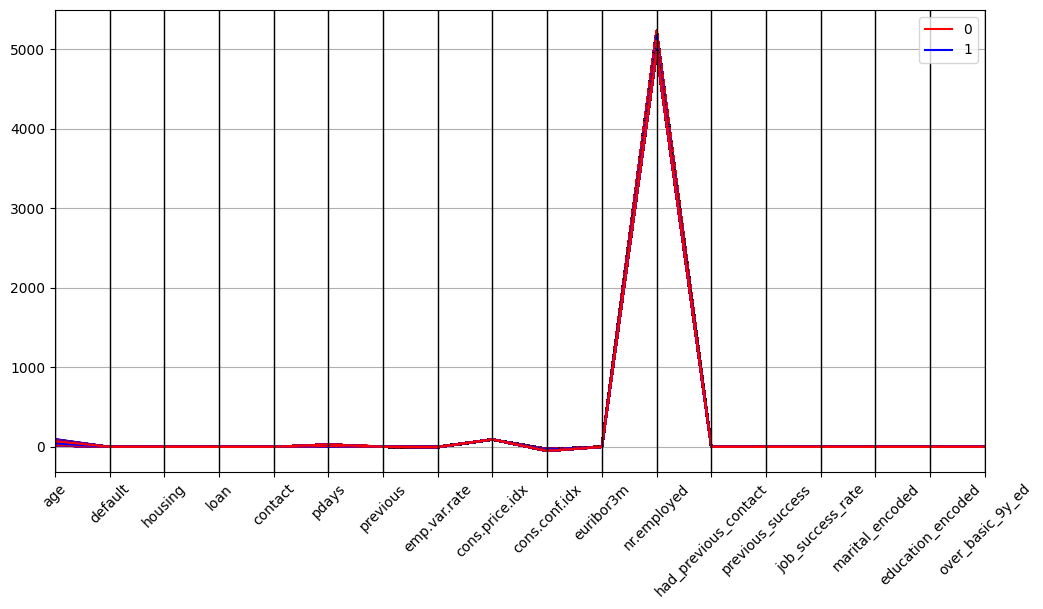

In [69]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'y', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [70]:
# Scaled non-binary data.
binary_cols = df.columns[(df.isin([0, 1])).all()].tolist() 
non_binary_cols = df.columns.difference(binary_columns).tolist()

# Scale non-binary columns
scaler = StandardScaler()
df_non_binary_scaled = pd.DataFrame(scaler.fit_transform(df[non_binary_cols]), columns=non_binary_cols)

# Combine scaled and original parts
df_sc = pd.concat([df[binary_cols], df_non_binary_scaled], axis=1)

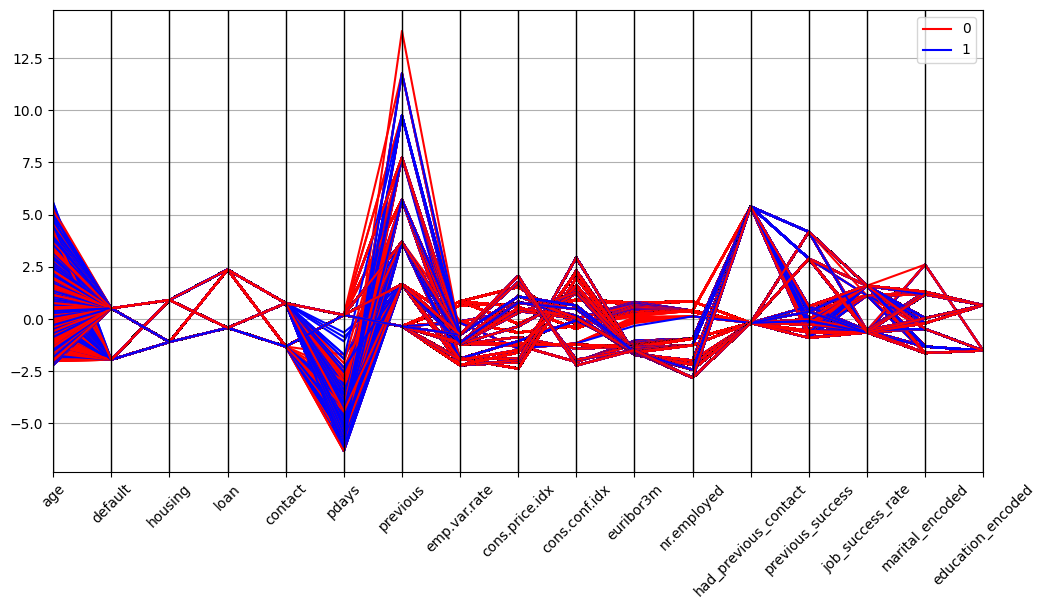

In [73]:
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['y'], axis=1)), columns=df.columns[:-1])
data_sc['y'] = df.y
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'y', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

We previously divided and generated the Scaled testing and training data, however, we wanted to display the differences from the scaled dataframe to visualise the importance of the scaling in this case.

Because we have a very unbalanced dataframe, we will generate two options using SMOTE. One where we generate synthetic examples of the minority class to balance the dataset and another one without doing so, to analyse the results.

In [86]:
# Parameter grid, we will adjust it depending on our needs.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [87]:
# Function to train and evaluate the model. We do not need the scaled data here, for this model does not rely on distance calculations between datapoints.
def train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=False):
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        print("Using SMOTE - Training set shape:", X_train.shape)
    else:
        print("Not using SMOTE - Training set shape:", X_train.shape)
    
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='balanced_accuracy')
    rf_random.fit(X_train, y_train)
    
    best_rf = rf_random.best_estimator_
    y_pred = best_rf.predict(X_test)
    
    print("\nBest Parameters:", rf_random.best_params_)
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Feature Importances:")
    print(feature_importance.head(10))
    
    plt.figure(figsize=(10, 6))
    feature_importance.head(10).plot(x='feature', y='importance', kind='bar')
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()
    
    return best_rf, feature_importance

Model without SMOTE:
Not using SMOTE - Training set shape: (32950, 18)
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Balanced Accuracy: 0.7652887518279163
F1 Score: 0.5159597726278968

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7310
           1       0.43      0.64      0.52       928

    accuracy                           0.87      8238
   macro avg       0.69      0.77      0.72      8238
weighted avg       0.89      0.87      0.88      8238


Confusion Matrix:
[[6541  769]
 [ 338  590]]

Top 10 Feature Importances:
              feature  importance
10          euribor3m        0.23
11        nr.employed        0.20
7        emp.var.rate        0.13
9       cons.conf.idx        0.08
5               pdays        0.06
0                 age        0.06
8      

<Figure size 1000x600 with 0 Axes>

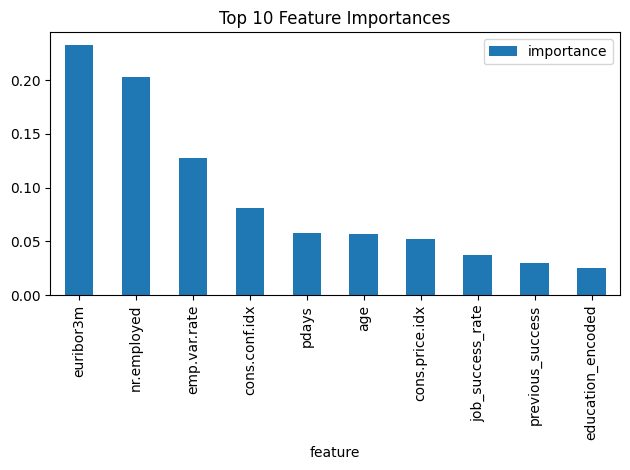

In [88]:
print("Model without SMOTE:")
rf_no_smote, importance_no_smote = train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=False)



Model with SMOTE:
Using SMOTE - Training set shape: (58476, 18)
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Balanced Accuracy: 0.670804489598566
F1 Score: 0.43686415320167565

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7310
           1       0.49      0.39      0.44       928

    accuracy                           0.89      8238
   macro avg       0.71      0.67      0.69      8238
weighted avg       0.88      0.89      0.88      8238


Confusion Matrix:
[[6932  378]
 [ 563  365]]

Top 10 Feature Importances:
              feature  importance
10          euribor3m        0.20
16  education_encoded        0.14
14   job_success_rate        0.12
0                 age        0.11
15    marital_encoded        0.10
11        nr.employed        0.08
9       con

<Figure size 1000x600 with 0 Axes>

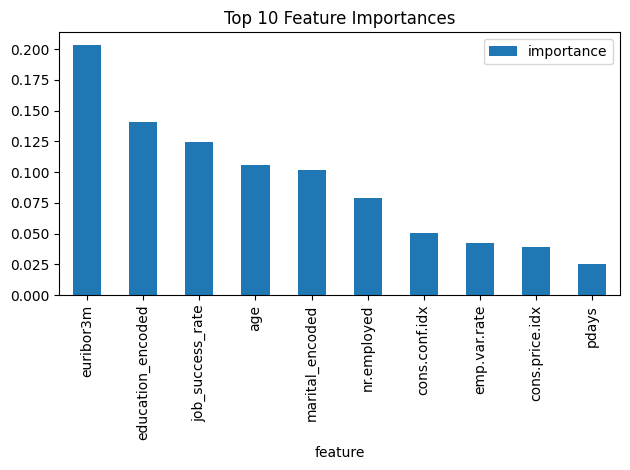

In [89]:
print("\nModel with SMOTE:")
rf_with_smote, importance_with_smote = train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=True)


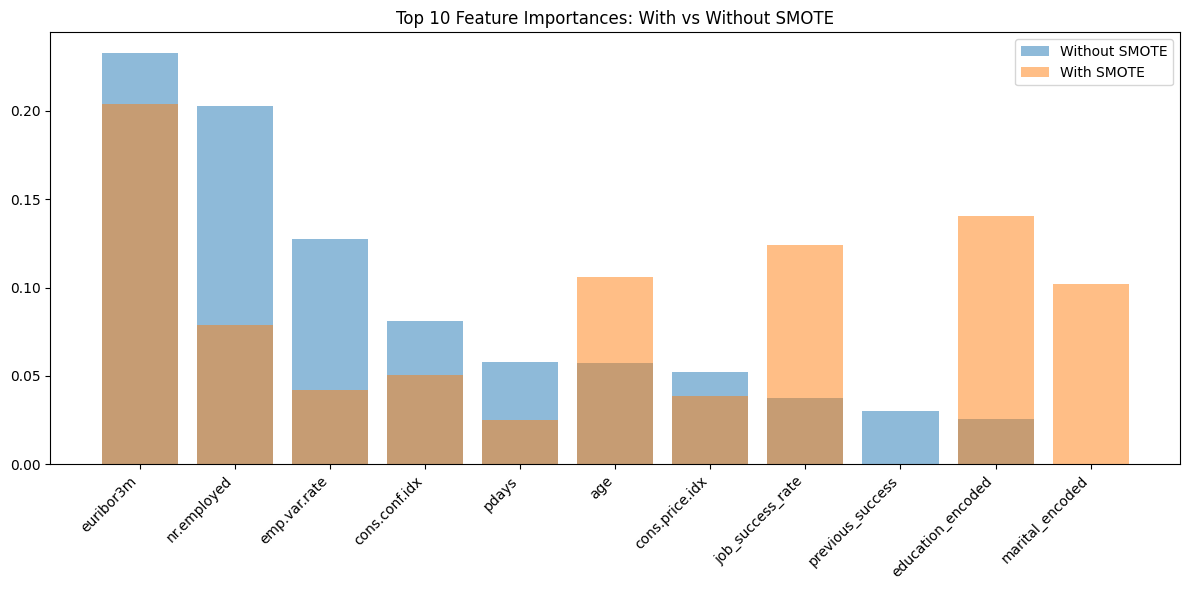

In [90]:
# Compare feature importances
plt.figure(figsize=(12, 6))
plt.bar(importance_no_smote['feature'][:10], importance_no_smote['importance'][:10], alpha=0.5, label='Without SMOTE')
plt.bar(importance_with_smote['feature'][:10], importance_with_smote['importance'][:10], alpha=0.5, label='With SMOTE')
plt.title('Top 10 Feature Importances: With vs Without SMOTE')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the analysis we can see the following:

Model without SMOTE:
    
    Balanced Accuracy: 0.7653
    F1 Score: 0.5160
    Precision for class 1 (minority): 0.43
    Recall for class 1 (minority): 0.64

Model with SMOTE:

    Balanced Accuracy: 0.6708
    F1 Score: 0.4369
    Precision for class 1 (minority): 0.49
    Recall for class 1 (minority): 0.39


Performance: The model with SMOTE performs better in terms of Balanced accuracy and F1 Score.
Confusion Matrix: Without SMOTE, 590 true positives and 338 false negatives. With SMOTE, 365 true positives and 563 false negatives.
Feature importance: When introducin SMOTE, it reduces importance in key variables and greatly increases the importance of variables that the original data doesn't raise importance.

### Conclusion: SMOTE's impact did not improve the model's performance, it actually it decreased it, as well as changing the importance ranking, potentially altering the model's focus. We will choose the model without SMOTE as it performs better 

We will continue now by tuning the hyperparameters of the forest.

In [91]:
second_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [92]:
second_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
second_rf_random = RandomizedSearchCV(estimator=second_rf, param_distributions=second_param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='balanced_accuracy')

In [93]:
second_rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [96]:
# Print the best parameters
print("Best parameters found:")
print(second_rf_random.best_params_)

Best parameters found:
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [98]:
third_param_grid = {
    'n_estimators': [300, 350, 400, 450, 500],
    'max_depth': [8, 9, 10, 11, 12],
    'min_samples_split': [8, 9, 10, 11, 12],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [99]:
third_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
third_rf_random = RandomizedSearchCV(estimator=third_rf, param_distributions=third_param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='balanced_accuracy')
third_rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [8, 9, 10, 11, 12],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 9, 10, 11, 12],
                                        'n_estimators': [300, 350, 400, 450,
                                                         500]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [100]:
final_param_grid = {
    'n_estimators': [325, 335, 345, 350, 355, 365, 375],
    'max_depth': [8, 9, 10],
    'min_samples_split': [10, 11, 12],
    'min_samples_leaf': [4, 5, 6],
    'max_features': ['log2', 'sqrt'],  
    'bootstrap': [False, True]  
}

In [101]:
final_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [102]:
# We will use GridSearchCV this time which is more exhaustive for our last search.
grid_search = GridSearchCV(estimator=final_rf, param_grid=final_param_grid, 
                           cv=5, verbose=2, n_jobs=-1, scoring='balanced_accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'max_depth': [8, 9, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [325, 335, 345, 350, 355, 365, 375]},
             scoring='balanced_accuracy', verbose=2)


Final Model Evaluation:
Balanced Accuracy: 0.7617235777631021
F1 Score: 0.5034071550255537

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7310
           1       0.42      0.64      0.50       928

    accuracy                           0.86      8238
   macro avg       0.68      0.76      0.71      8238
weighted avg       0.89      0.86      0.87      8238


Confusion Matrix:
[[6481  829]
 [ 337  591]]

Top 10 Feature Importances:
             feature  importance
10         euribor3m        0.23
11       nr.employed        0.21
7       emp.var.rate        0.14
9      cons.conf.idx        0.09
5              pdays        0.07
8     cons.price.idx        0.06
13  previous_success        0.04
0                age        0.03
14  job_success_rate        0.02
4            contact        0.02


<Figure size 1000x600 with 0 Axes>

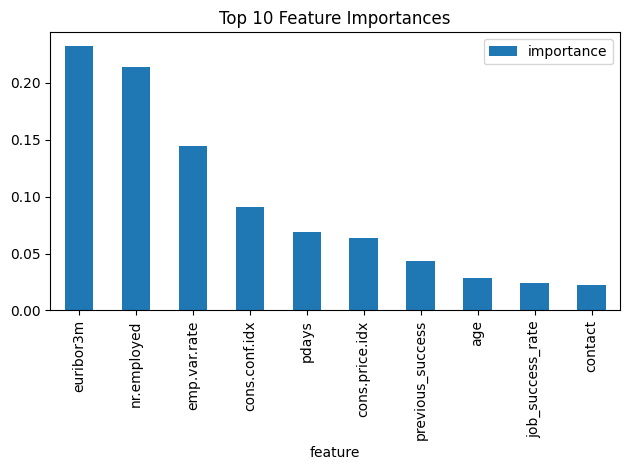

In [103]:
# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nFinal Model Evaluation:")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(x='feature', y='importance', kind='bar')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [104]:
final_model = RandomForestClassifier(
    bootstrap=False, 
    class_weight='balanced', 
    max_depth=9,
    max_features='log2', 
    min_samples_leaf=5,
    min_samples_split=11, 
    n_estimators=355, 
    random_state=42
)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [105]:
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Balanced Accuracy: 0.7617235777631021
F1 Score: 0.5034071550255537

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7310
           1       0.42      0.64      0.50       928

    accuracy                           0.86      8238
   macro avg       0.68      0.76      0.71      8238
weighted avg       0.89      0.86      0.87      8238


Confusion Matrix:
[[6481  829]
 [ 337  591]]


We will now use cross validation to analyse to what degree it is correctly predicting, as well as finding out if there is overfitting.

In [107]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [109]:
def get_metrics_cv(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)

    return pd.Series({
        'Accuracy': accuracy,
        'F1': f1,
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity
    })

In [110]:
n_folds = 5
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

In [112]:
y_pred = cross_val_predict(final_model, X, y, cv=cv)

In [113]:
metrics = get_metrics_cv(y, y_pred)
print("Métricas de validación cruzada:")
print(metrics)

Métricas de validación cruzada:
Accuracy      0.85
F1            0.48
AUC           0.75
Precision     0.40
Recall        0.62
Specificity   0.88
dtype: float64


In [114]:
# Entrenamos el modelo en todo el conjunto de datos y obtenemos predicciones
final_model.fit(X, y)
y_pred_train = final_model.predict(X)

# Calculamos las métricas de entrenamiento
metrics_train = get_metrics_cv(y, y_pred_train)

print("\nMétricas de entrenamiento:")
print(metrics_train)


Métricas de entrenamiento:
Accuracy      0.86
F1            0.50
AUC           0.76
Precision     0.41
Recall        0.63
Specificity   0.89
dtype: float64



Resumen de métricas:
             Train   CV  Diferencia
Accuracy      0.86 0.85        0.01
F1            0.50 0.48        0.01
AUC           0.76 0.75        0.01
Precision     0.41 0.40        0.01
Recall        0.63 0.62        0.01
Specificity   0.89 0.88        0.00


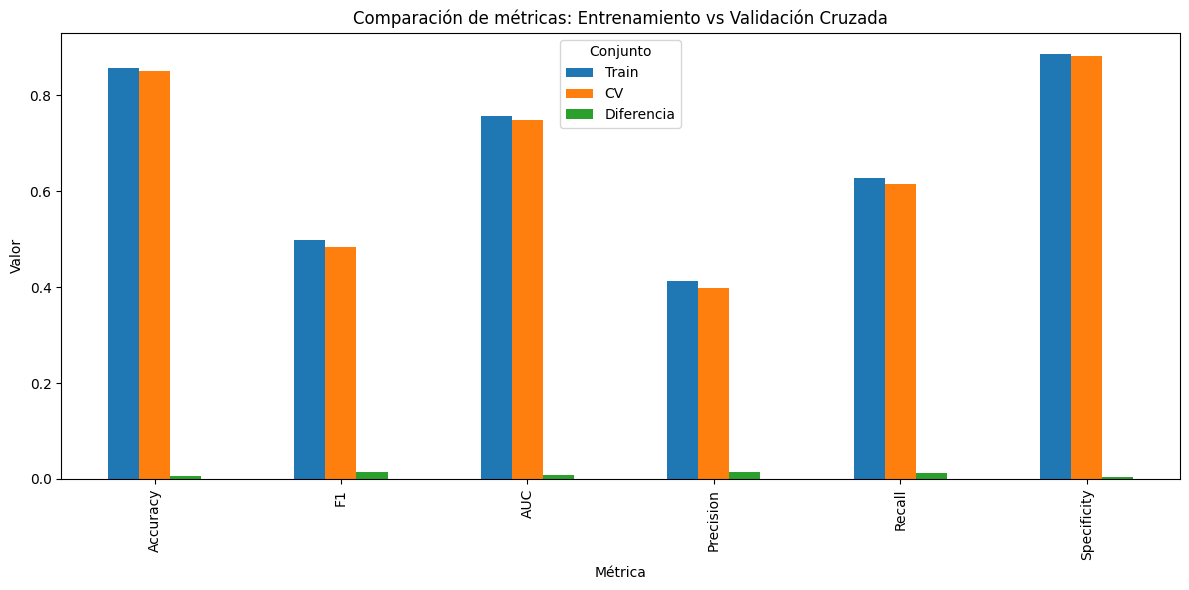

In [115]:
# Calculamos la diferencia
diff_metrics = metrics_train - metrics

# Creamos el DataFrame final
metrics_df = pd.DataFrame({
    'Train': metrics_train,
    'CV': metrics,
    'Diferencia': diff_metrics
})

print("\nResumen de métricas:")
print(metrics_df)

# Visualizamos las métricas
import matplotlib.pyplot as plt

metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de métricas: Entrenamiento vs Validación Cruzada')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Conjunto')
plt.tight_layout()
plt.show()

In [119]:
joblib.dump(final_model, 'random_forest_model.joblib')

print("Modelo guardado como 'random_forest_model.joblib'")

Modelo guardado como 'random_forest_model.joblib'
